# PCA On diabetes Dataset
## CPE 490 590 Spring 2024
### Author: Rahul Bhadani

# Let's read the datset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [19]:
import pandas as pd
# load dataset
data = pd.read_csv("Dataset/Diabetes/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
# Assuming that 'data' is your DataFrame and it includes an 'Outcome' column
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = data.loc[:, features].values
y = data.loc[:,['Outcome']].values

# Do PCA

In [21]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

## Make Plot


Explained variation per principal component: [0.26179749 0.21640127]


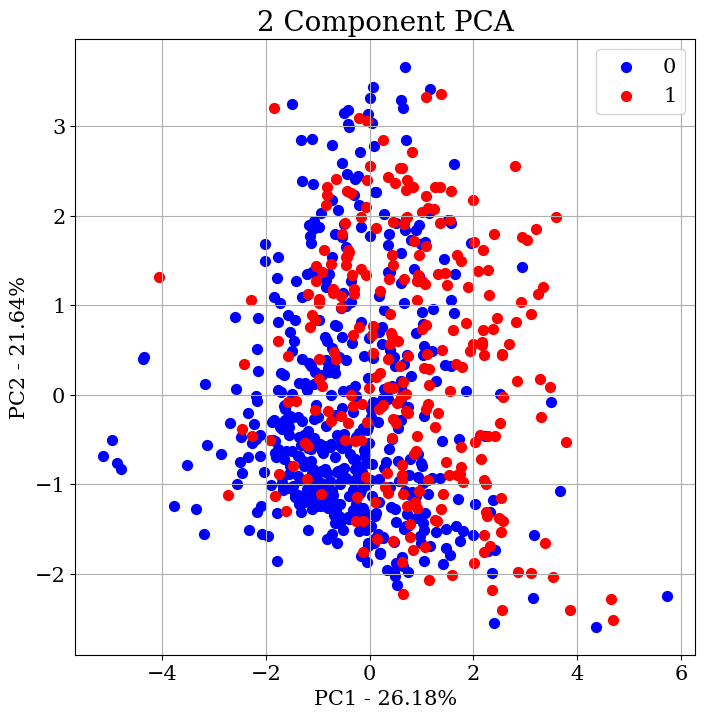

In [22]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['Outcome']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.set_xlabel('PC1 - {0}%'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
ax.set_ylabel('PC2 - {0}%'.format(round(pca.explained_variance_ratio_[1]*100, 2)))

ax.grid()

fig.savefig('figures/hw05_Q2_1_1.pdf', format='pdf', bbox_inches='tight')

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# 3D Plot

In [20]:
# Apply PCA
pca_3 = PCA(n_components=3)
data_3d = pca_3.fit_transform(x)

import plotly.express as px
import pandas as pd
# Create a DataFrame for the 3D PCA result
df_3d = pd.DataFrame(data_3d, columns=['PC1', 'PC2', 'PC3'])
df_3d['Outcome'] = y  # Add the labels to the DataFrame

# Create the 3D plot
fig = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3', color='Outcome')

# Customize the axes labels
fig.update_layout(scene=dict(
                    xaxis=dict(range=[df_3d['PC1'].min(), df_3d['PC1'].max()]),
                    yaxis=dict(range=[df_3d['PC2'].min(), df_3d['PC2'].max()]),
                    zaxis=dict(range=[df_3d['PC3'].min(), df_3d['PC3'].max()]),
                    aspectmode='cube',
                    xaxis_title='PC1 - {0}%'.format(round(pca_3.explained_variance_ratio_[0]*100, 2)),
                    yaxis_title='PC2 - {0}%'.format(round(pca_3.explained_variance_ratio_[1]*100, 2)),
                    zaxis_title='PC3 - {0}%'.format(round(pca_3.explained_variance_ratio_[2]*100, 2))
))

fig.show()



In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming that 'data' is your DataFrame and it includes an 'Outcome' column
features = data.drop('Outcome', axis=1)
labels = data['Outcome']



# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# Defining the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=1)

# Saving the model
model.save('model.h5')

# Plotting the loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss as a function of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('figures/hw05_Q2_2_1.pdf', format='pdf', bbox_inches='tight')

plt.show()


Epoch 1/200


ValueError: in user code:

    File "/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [12]:
# Assuming that 'data' is your DataFrame and it includes an 'Outcome' column
new_data = np.array([[7, 149, 73, 34, 94, 32, 0.672, 45]])

# standardize the dataset
new_data = scaler.transform(new_data)
# Making a prediction
prediction = model.predict(new_data)
prediction
print('The predicted outcome is: ', np.round(prediction))


1/1 [==============================] - 0s 12ms/step
The predicted outcome is:  [[1.]]


/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
